LLM models evaluation

In [1]:
from trulens_eval import TruChain, Feedback, Tru, feedback, Select
from trulens_eval.tru_custom_app import instrument
tru = Tru()
import dotenv
dotenv.load_dotenv()
from pinecone_code import PineconeServerless
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


Package langchain-community is installed but has a version conflict:
	(langchain-community 0.0.11 (c:\users\madhu\appdata\roaming\python\python311\site-packages), Requirement.parse('langchain_community>=0.0.17'))

This package is optional for trulens_eval so this may not be a problem but if
you need to use the related optional features and find there are errors, you
will need to resolve the conflict:

    ```bash
    pip install 'langchain_community>=0.0.17'
    ```

If you are running trulens_eval in a notebook, you may need to restart the
kernel after resolving the conflict. If your distribution is in a bad place
beyond this package, you may need to reinstall trulens_eval so that all of the
dependencies get installed and hopefully corrected:
    
    ```bash
    pip uninstall -y trulens_eval
    pip install trulens_eval
    ```



Using legacy llama_index version None. Consider upgrading to 0.10.0 or later.


🦑 Tru initialized with db url sqlite:///default.sqlite .
🛑 Secret keys may be written to the database. See the `database_redact_keys` option of Tru` to prevent this.


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load your DataFrame
# Example:
# df = pd.DataFrame({'answer': ['text1', 'text2', 'text3'], 'ground_truth': ['text4', 'text5', 'text6']})

def calculate_cosine_similarity(text1, text2):
    vectorizer = CountVectorizer().fit_transform([text1, text2])
    vectors = vectorizer.toarray()
    return cosine_similarity([vectors[0]], [vectors[1]])[0][0]

df['cosine_similarity'] = df.apply(lambda row: calculate_cosine_similarity(row['answer'], row['ground_truth']), axis=1)

Plotting

C:\Users\madhu\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\madhu\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\madhu\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\madhu\A

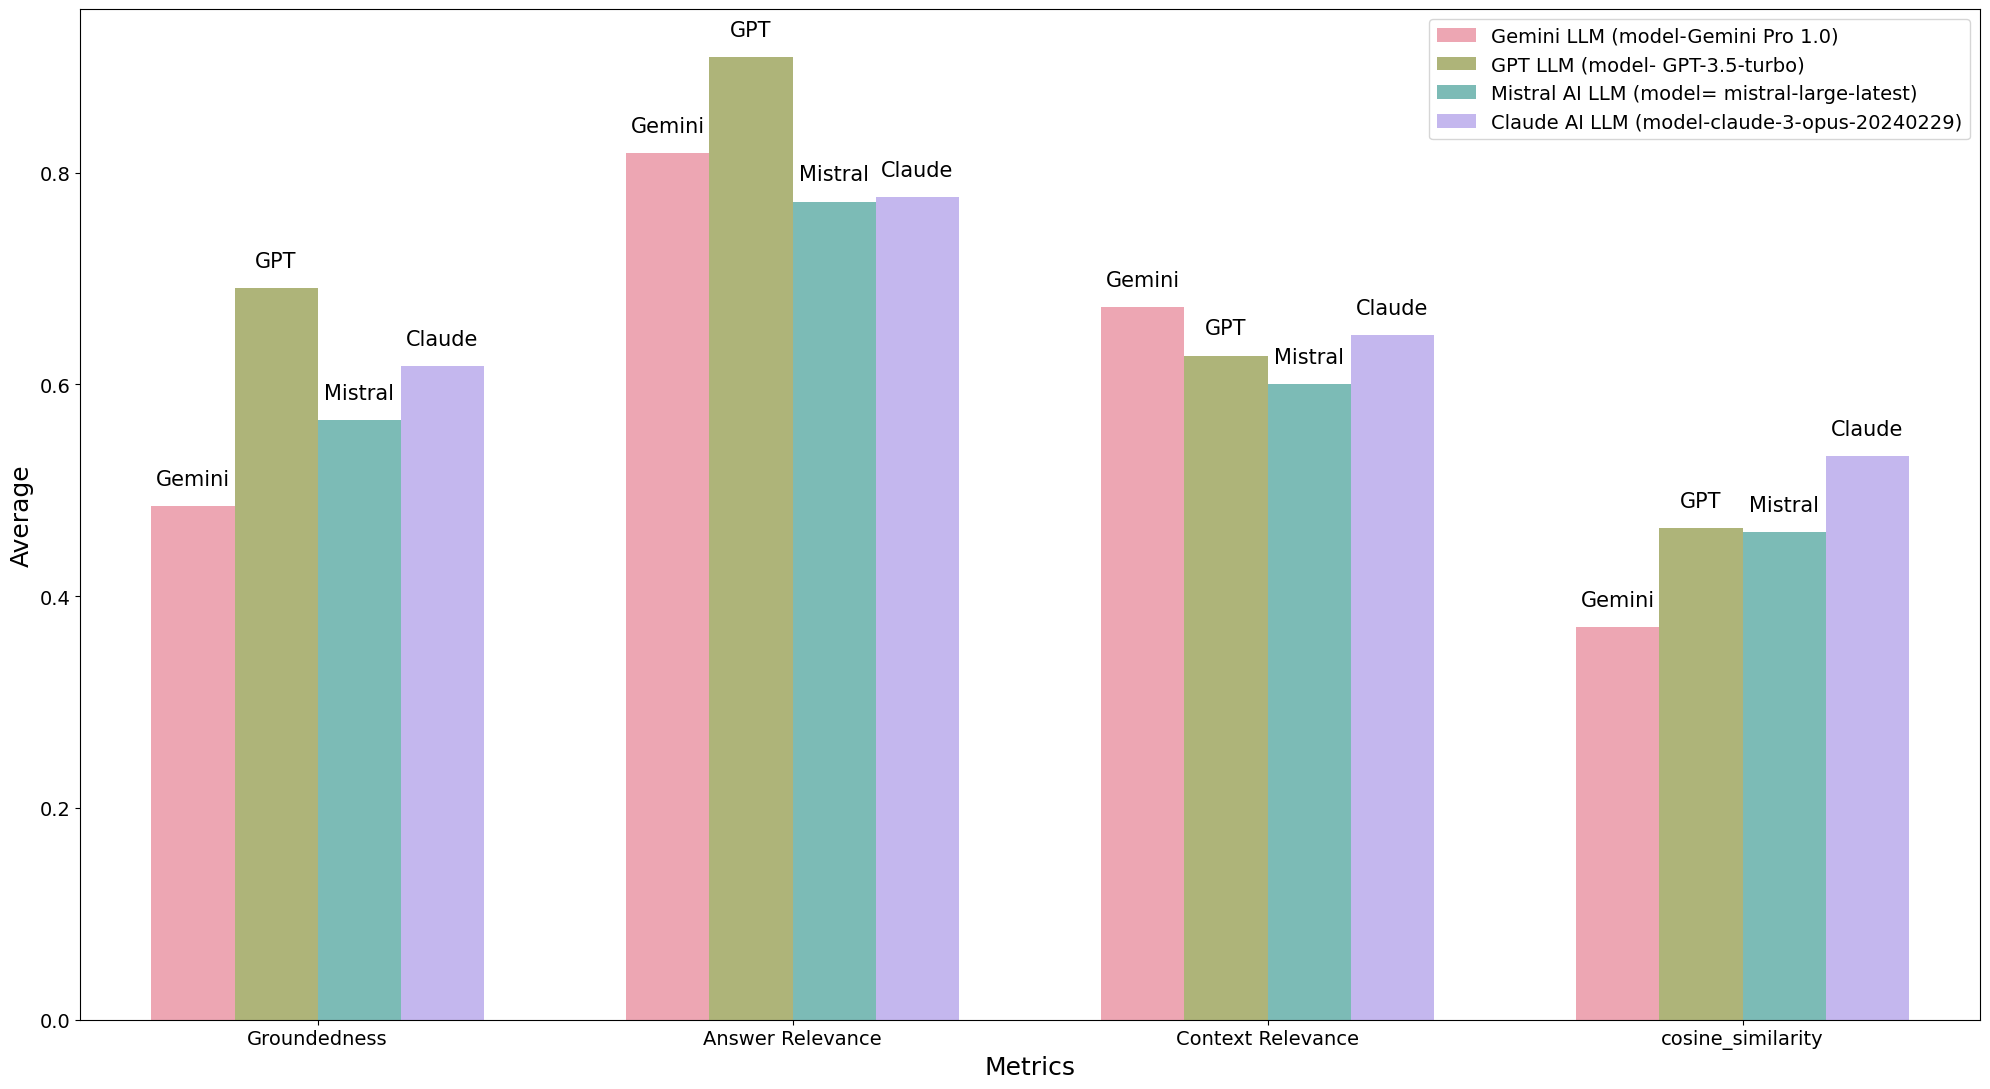

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import repeat

# Load data
gemini_pro_llm_data = pd.read_csv('gemini_pro_results.csv')
gpt_llm_data = pd.read_csv('gpt_results.csv')
mistraltiny_llm_data = pd.read_csv('mistrallarge_results_new.csv')

claudeopus_llm_data = pd.read_csv('claude3opus_results.csv')

# Calculate averages
gemini_pro_llm_avg = gemini_pro_llm_data[['Groundedness', 'Answer Relevance', 'Context Relevance','cosine_similarity']].mean()
gpt_llm_avg = gpt_llm_data[['Groundedness', 'Answer Relevance', 'Context Relevance','cosine_similarity']].mean()
mistraltiny_llm_avg = mistraltiny_llm_data[['Groundedness', 'Answer Relevance', 'Context Relevance','cosine_similarity']].mean()
claudeopus_llm_avg = claudeopus_llm_data[['Groundedness', 'Answer Relevance', 'Context Relevance','cosine_similarity']].mean()

# Data for plotting
labels = ['Groundedness', 'Answer Relevance', 'Context Relevance']
gemini_pro_llm_values = gemini_pro_llm_avg.values
gpt_llm_values = gpt_llm_avg.values
mistraltiny_llm_values = mistraltiny_llm_avg.values
claudeopus_llm_values = claudeopus_llm_avg.values

# Create DataFrame for plotting
df = pd.DataFrame({
    #'Model_label':['Gemini',"GPT","Mistral",'Claude'],
    'Model': ['Gemini LLM (model-Gemini Pro 1.0)', 'GPT LLM (model- GPT-3.5-turbo)', 'Mistral AI LLM (model= mistral-large-latest)', 'Claude AI LLM (model-claude-3-opus-20240229)'],
    'Groundedness': [gemini_pro_llm_values[0],gpt_llm_values[0],mistraltiny_llm_values[0],claudeopus_llm_values[0]],
    'Answer Relevance': [gemini_pro_llm_values[1],gpt_llm_values[1],mistraltiny_llm_values[1],claudeopus_llm_values[1]],
    'Context Relevance': [gemini_pro_llm_values[2],gpt_llm_values[2],mistraltiny_llm_values[2],claudeopus_llm_values[2]],
    'cosine_similarity':[gemini_pro_llm_values[3],gpt_llm_values[3],mistraltiny_llm_values[3],claudeopus_llm_values[3]]

})

# Melt DataFrame for Seaborn plotting
df_melted = df.melt(id_vars='Model', var_name='Metrics', value_name='Average')

# Plot using Seaborn with custom colors
plt.figure(figsize=(20, 11))
colors = sns.color_palette('husl', 4)
bar_width = 0.15 # Adjust the width here
first_names = [name.split()[0] for name in df['Model']]
model_label = [name for name in first_names for _ in repeat(None, 4)]
ax=sns.barplot(x='Metrics', y='Average', hue='Model', data=df_melted, palette=colors,alpha=0.7,width=0.70 )
#ax.set_ylim(0, 1.5)
for bar, label in zip(ax.patches, model_label):
    x = bar.get_x()
    width = bar.get_width()
    height = bar.get_height()
    ax.text(x+width/2., height + 0.02, label, ha="center",fontsize=15) 

ax.set_xlabel('Metrics', fontsize=18)  # Adjust the font size as needed
ax.set_ylabel('Average', fontsize=18)  # Adjust the font size as needed
#ax.set_title('Average Metrics Comparison Between LLMs.', fontsize=20)  # Adjust the font size as needed
ax.tick_params(axis='both', labelsize=14)  # Adjust the font size of tick labels as needed

# Set labels and title
plt.xlabel('Metrics')
plt.ylabel('Average')


plt.legend(loc='upper right', fontsize=14)#,bbox_to_anchor=(1, 1.15), ncol=2)
# Show plot
plt.tight_layout()
plt.savefig("LLM_Comparison.png")
plt.show()

In [4]:
df_melted


,Model,Metrics,Average
0,Gemini LLM (model-Gemini Pro Parameter-17B),Groundedness,0.484848
1,GPT LLM (model- GPT-3.5-turbo Parameters-20B),Groundedness,0.690909
2,Mistral AI LLM (model= mistral-large-latest),Groundedness,0.566667
3,Claude AI LLM (model-claude-3-opus-20240229 P...,Groundedness,0.617022
4,Gemini LLM (model-Gemini Pro Parameter-17B),Answer Relevance,0.818182
5,GPT LLM (model- GPT-3.5-turbo Parameters-20B),Answer Relevance,0.909091
6,Mistral AI LLM (model= mistral-large-latest),Answer Relevance,0.772727
7,Claude AI LLM (model-claude-3-opus-20240229 P...,Answer Relevance,0.776923
8,Gemini LLM (model-Gemini Pro Parameter-17B),Context Relevance,0.672727
9,GPT LLM (model- GPT-3.5-turbo Parameters-20B),Context Relevance,0.627273
